<a href="https://colab.research.google.com/github/Ejemuta/Capstone-Project-Assignment/blob/master/Transport_Operations_and_Commercial_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Title: Transport Operations & Commercial Performance

In [9]:
import pandas as pd

df = pd.read_csv("transport_operations.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df.head(10)

,date,route_id,route_name,passengers,revenue,on_time_pct,cancellations
0,2025-01-01,1,City Centre Loop,824,1751.00,89,1
1,2025-01-01,2,Airport Express,543,2863.09,88,0
2,2025-01-01,3,University Shuttle,988,988.00,94,0
3,2025-01-02,1,City Centre Loop,788,1674.50,91,1
4,2025-01-02,2,Airport Express,569,3000.18,88,0
5,2025-01-02,3,University Shuttle,953,953.00,95,0
6,2025-01-03,1,City Centre Loop,770,1636.25,91,0
7,2025-01-03,2,Airport Express,523,2757.64,87,0
8,2025-01-03,3,University Shuttle,869,869.00,92,0
9,2025-01-04,1,City Centre Loop,847,1799.88,89,0


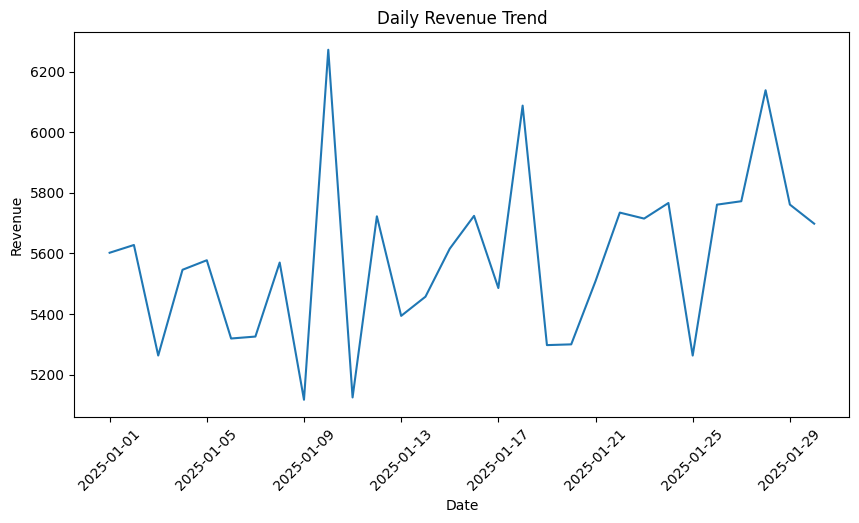

In [3]:
## Daily Revenue Trend (Line Chart)

import matplotlib.pyplot as plt

daily_rev = df.groupby('date')['revenue'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_rev.index, daily_rev.values)
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()



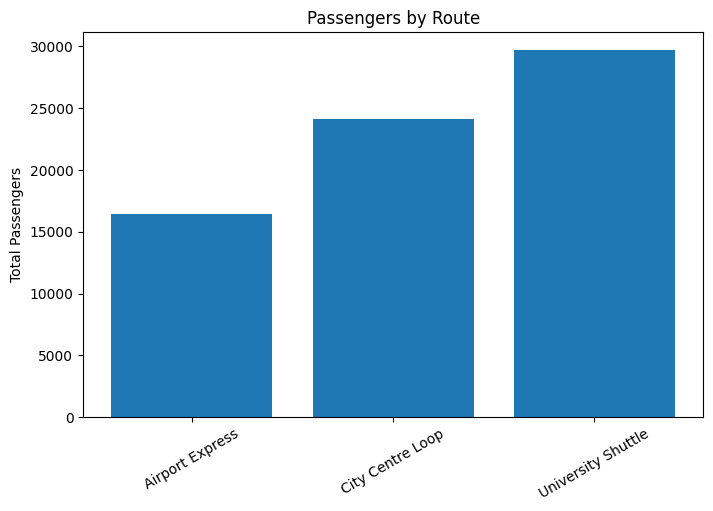

In [4]:
## Route Performance (Bar Chart)

route_perf = df.groupby('route_name')['passengers'].sum()

plt.figure(figsize=(8,5))
plt.bar(route_perf.index, route_perf.values)
plt.title("Passengers by Route")
plt.ylabel("Total Passengers")
plt.xticks(rotation=30)
plt.show()


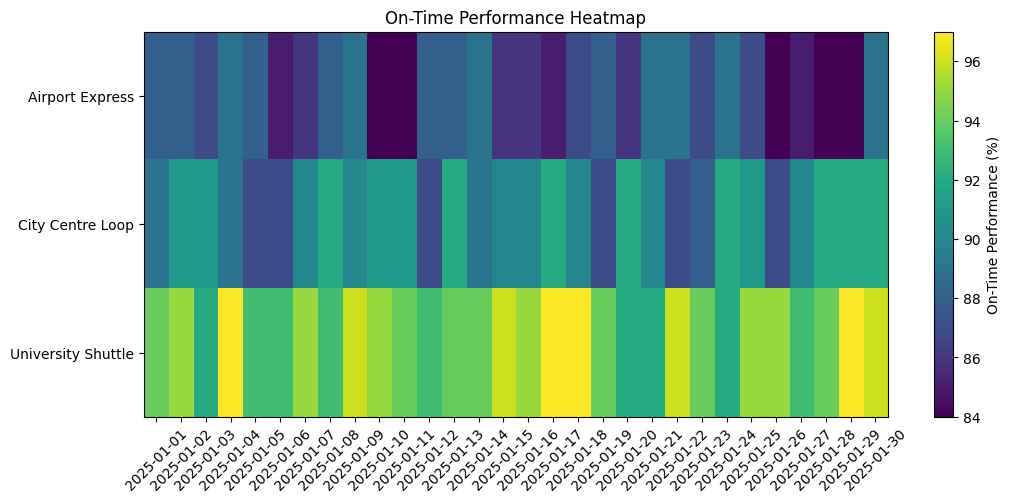

In [5]:
## On-Time Performance Heatmap

pivot = df.pivot_table(
    values="on_time_pct",
    index="route_name",
    columns="date"
)

plt.figure(figsize=(12,5))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="On-Time Performance (%)")
plt.title("On-Time Performance Heatmap")
plt.xticks(range(len(pivot.columns)), pivot.columns.date, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.show()


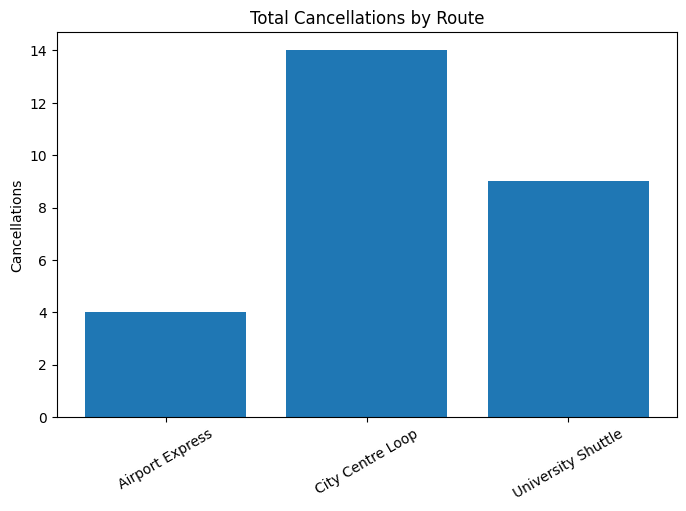

In [6]:
## Cancellation Counts

cxl = df.groupby("route_name")["cancellations"].sum()

plt.figure(figsize=(8,5))
plt.bar(cxl.index, cxl.values)
plt.title("Total Cancellations by Route")
plt.ylabel("Cancellations")
plt.xticks(rotation=30)
plt.show()

In [11]:
route_revenue = df.groupby('route_name')['revenue'].sum()
highest_revenue_route = route_revenue.idxmax()
max_revenue_value = route_revenue.max()

print(f"The route with the highest revenue is '{highest_revenue_route}' with a total revenue of ${max_revenue_value:,.2f}.")

The route with the highest revenue is 'Airport Express' with a total revenue of $86,514.91.
